# Assignment 1

## Part A: Linguistic analysis using spaCy

### 1. Tokenization (1 point)
Process the dataset using the spaCy package and extract the following information:
**Number of tokens:
Number of types:  
Number of words:
Average number of words per sentence:
Average word length: 
Provide the definition that you used to determine words:**

In [27]:
%%bash
python -m spacy download en
pip3 install wordfreq

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [28]:
import spacy
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from wordfreq import word_frequency
from wordfreq import zipf_frequency

In [29]:
# This loads a small English model trained on web data.
# For other models and languages check: https://spacy.io/models
nlp = spacy.load('en_core_web_sm')

In [30]:
cwd = os.getcwd()
print(cwd)
with open(f"{cwd}/data/preprocessed/train/sentences.txt", "r") as file:
    train_dataset = file.read()
doc = nlp(train_dataset)

/home/damion/VU/NLPT/NLPT


In [31]:
# Making our test doc for later testing
test_input = "I have an awesome cat. It's sitting on the mat that I bought yesterday."
doc_test = nlp(test_input)

In [32]:
# Counting words and frequencies
word_frequencies = Counter()
words_per_sencence = []
words_length = []
avg_num_words = []

for sentence in doc.sents:
    words = []
    lengths = []
    num_words = 0
    for token in sentence: 
        # Let's filter out punctuation
        if (not token.is_punct) and (not token.is_space):
            words.append(token.text)
            lengths.append(len(token.text))
            num_words += 1
    avg_num_words.append(num_words)
    # words_length.append(np.mean(lengths))
    word_frequencies.update(words)
    
# print(word_frequencies)
num_tokens = len(doc)
num_words = sum(word_frequencies.values())
num_types = len(word_frequencies.keys())
avg_num_words_sentence = np.mean(avg_num_words)
avg_num_word_length = np.nanmean(lengths)


print(f"Num tokens: {num_tokens}\nNum words: {num_words}\nNum types: {num_types}\nWords per sentence: {np.around(avg_num_words_sentence, 3)}\nAverage length per word: {np.around(avg_num_word_length, 3)}")

Num tokens: 16130
Num words: 13242
Num types: 3721
Words per sentence: 18.443
Average length per word: 3.571


**Important: I saw that the words also contained "/n", so we might want to remove that one? In that case:**

In [33]:
# Counting words and frequencies
word_frequencies = Counter()
words_per_sencence = []
words_length = []
avg_num_words = []

for sentence in doc.sents:
    words = []
    lengths = []
    num_words = 0
    for token in sentence: 
        # Let's filter out punctuation
        if not (token.is_punct or token.text == "\n"):
            words.append(token.text)
            lengths.append(len(token.text))
            num_words += 1
    avg_num_words.append(num_words)
    words_length.append(np.mean(lengths))
    word_frequencies.update(words)

# print(word_frequencies)
num_tokens = len(doc)
num_words = sum(word_frequencies.values())
num_types = len(word_frequencies.keys())
avg_num_words_sentence = np.mean(avg_num_words)
avg_num_word_length = np.nanmean(words_length)


print(f"Num tokens: {num_tokens}\nNum words: {num_words}\nNum types: {num_types}\nWords per sentence: {np.around(avg_num_words_sentence, 3)}\nAverage length per word: {np.around(avg_num_word_length, 3)}")

Num tokens: 16130
Num words: 13242
Num types: 3721
Words per sentence: 18.443
Average length per word: 4.891


/home/damion/anaconda3/envs/NLPT/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/damion/anaconda3/envs/NLPT/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Our definition of a word: Any token not part of the punctuation set or the "\n" character

### 2. Word Classes (1.5 points)

Run the default part-of-speech tagger on the dataset and identify the ten most frequent 
POS tags. Complete the table below for these ten tags (the tagger in the model 
en_core_web_sm is trained on the PENN Treebank tagset). 

In [34]:
pos_list = []

NN_Noun = []
NNP_Propn = []
IN_Adp = []
DT_Det = []
JJ_Adj = []
NNS_Noun = []
COMMA_Punct = []
PERIOD_Punct = []
SP_Space = []
VBN_Verb = []

for token in doc:
    #print(token.pos_, token.tag_)
    pos_list.append('{}, {}'.format(token.pos_, token.tag_))
    if ('{}, {}'.format(token.pos_, token.tag_) == 'NOUN, NN'):
        NN_Noun.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'PROPN, NNP'):
        NNP_Propn.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'ADP, IN'):
        IN_Adp.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'DET, DT'):
        DT_Det.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'ADJ, JJ'):
        JJ_Adj.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'NOUN, NNS'):
        NNS_Noun.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'PUNCT, ,'):
        COMMA_Punct.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'PUNCT, .'):
        PERIOD_Punct.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'SPACE, _SP'):
        SP_Space.append(token.text)

    elif ('{}, {}'.format(token.pos_, token.tag_) == 'VERB, VBN'):
        VBN_Verb.append(token.text)


pos_frequencies = Counter(pos_list)
rtf = []
rtf.append(round(pos_frequencies['NOUN, NN']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['PROPN, NNP']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['ADP, IN']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['DET, DT']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['ADJ, JJ']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['NOUN, NNS']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['PUNCT, ,']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['PUNCT, .']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['SPACE, _SP']/sum(pos_frequencies.values()), 2))
rtf.append(round(pos_frequencies['VERB, VBN']/sum(pos_frequencies.values()), 2))

finegrained = ["NOUN", "PROPN", "ADP", "DET", "ADJ", "NOUN", "PUNCT", "PUNCT", "SPACE", "VERB"]
universal = ["NN", "NNP", "IN", "DT", "JJ", "NNS", ",", ".", "_SP", "VBN"]
occurrences = [len(NN_Noun), len(NNP_Propn), len(IN_Adp), len(DT_Det), len(JJ_Adj), len(NNS_Noun), len(COMMA_Punct), len(PERIOD_Punct), len(SP_Space), len(VBN_Verb)]

most_frequent = []
most_frequent.append(Counter(NN_Noun).most_common(3))
most_frequent.append(Counter(NNP_Propn).most_common(3))
most_frequent.append(Counter(IN_Adp).most_common(3))
most_frequent.append(Counter(DT_Det).most_common(3))
most_frequent.append(Counter(JJ_Adj).most_common(3))
most_frequent.append(Counter(NNS_Noun).most_common(3))
most_frequent.append(Counter(COMMA_Punct).most_common(3))
most_frequent.append(Counter(PERIOD_Punct).most_common(3))
most_frequent.append(Counter(SP_Space).most_common(3))
most_frequent.append(Counter(VBN_Verb).most_common(3))

least_frequent = []
least_frequent.append(Counter(NN_Noun).most_common()[-1])
least_frequent.append(Counter(NNP_Propn).most_common()[-1])
least_frequent.append(Counter(IN_Adp).most_common()[-1])
least_frequent.append(Counter(DT_Det).most_common()[-1])
least_frequent.append(Counter(JJ_Adj).most_common()[-1])
least_frequent.append(Counter(NNS_Noun).most_common()[-1])
least_frequent.append(Counter(COMMA_Punct).most_common()[-1])
least_frequent.append(Counter(PERIOD_Punct).most_common()[-1])
least_frequent.append(Counter(SP_Space).most_common()[-1])
least_frequent.append(Counter(VBN_Verb).most_common()[-1])

word_class_table = pd.DataFrame({"Finegrained POS-tag":finegrained, "Universal POS-tag":universal, "Occurrences": occurrences, "Relative Tag Frequency (%)" : rtf, "3 most frequent tokens" : most_frequent, "Example of infrequent token": least_frequent})
word_class_table.head(10)

,Finegrained POS-tag,Universal POS-tag,Occurrences,Relative Tag Frequency (%),3 most frequent tokens,Example of infrequent token
0,NOUN,NN,2066,0.13,"[(\, 52), (year, 29), (report, 23)]","(project, 1)"
1,PROPN,NNP,2060,0.13,"[(\, 211), (US, 24), (President, 19)]","(Navy, 1)"
2,ADP,IN,1600,0.10,"[(of, 352), (in, 281), (to, 153)]","(By, 1)"
3,DET,DT,1313,0.08,"[(the, 723), (a, 279), (The, 124)]","(Each, 1)"
4,ADJ,JJ,868,0.05,"[(other, 26), (Russian, 20), (presidential, 18)]","(Sebastian, 1)"
5,NOUN,NNS,774,0.05,"[(ants, 42), (troops, 19), (people, 15)]","(areas, 1)"
6,PUNCT,",",699,0.04,"[(,, 697), (;, 1), (…, 1)]","(…, 1)"
7,PUNCT,.,655,0.04,"[(., 638), (?, 16), (!, 1)]","(!, 1)"
8,SPACE,_SP,653,0.04,"[(\n, 653)]","(\n, 653)"
9,VERB,VBN,454,0.03,"[(accused, 12), (reported, 8), (known, 8)]","(acquitted, 1)"


### 3 N-Grams (1.5 points)
Calculate the distribution of n-grams and provide the 3 most frequent
Token bigrams,
Token trigrams,
POS bigrams,
and POS trigrams

First the token bigrams:

In [35]:
token_bi = []
pos_bi = []
token_tri = []
pos_tri = []


loop_counter = 0



for token in doc:
  
    try:
        token_bi.append(f"{doc[loop_counter]}, {doc[loop_counter + 1]}")
        pos_bi.append(f"{doc[loop_counter].pos_}, {doc[loop_counter + 1].pos_}")
    except:
        pass
    try:
        token_tri.append(f"{doc[loop_counter]}, {doc[loop_counter + 1]}, {doc[loop_counter + 2]}")
        pos_tri.append(f"{doc[loop_counter].pos_}, {doc[loop_counter + 1].pos_}, {doc[loop_counter + 3].pos_}")
    except:
        pass
    loop_counter += 1
    
print(f"3 most frequent:\n\nToken Bigrams: {Counter(token_bi).most_common(3)}\nToken Trigrams: {Counter(token_tri).most_common(3)}\nPOS Bigrams: {Counter(pos_bi).most_common(3)}\nPOS Trigrams: {Counter(token_tri).most_common(3)}")

3 most frequent:

Token Bigrams: [('., \n', 595), ('\\, "', 240), ('\n, The', 114)]
Token Trigrams: [('., \n, The', 104), (',, \\, "', 40), ('\\, ", \n', 38)]
POS Bigrams: [('DET, NOUN', 780), ('NOUN, PUNCT', 769), ('NOUN, ADP', 707)]
POS Trigrams: [('., \n, The', 104), (',, \\, "', 40), ('\\, ", \n', 38)]


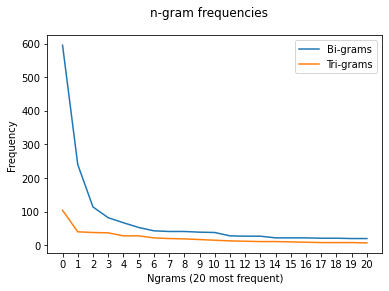

In [36]:
ngrams_bi = dict(Counter(token_bi))
ngrams_tri = dict(Counter(token_tri))
ngrams_sorted_bi = sorted(ngrams_bi.items(), key=lambda x: x[1], reverse=True)
ngrams_sorted_tri = sorted(ngrams_tri.items(), key=lambda x: x[1], reverse=True)

frequencies_bi = []
frequencies_tri = []
for i in range(len(ngrams_sorted_bi)):
    frequencies_bi.append(ngrams_sorted_bi[i][1])
for i in range(len(ngrams_sorted_tri)):
    frequencies_tri.append(ngrams_sorted_tri[i][1])

x = range(11251)
y = range(14264)
plt.plot(frequencies_bi[0:21])
plt.plot(frequencies_tri[0:21])
plt.legend(["Bi-grams", "Tri-grams"])
plt.suptitle('n-gram frequencies')
plt.ylabel("Frequency")
plt.xlabel("Ngrams (20 most frequent)")
plt.xticks(range(0, 21))
plt.savefig(f"{cwd}/plots/1.3_ngram_distr.png")
plt.show()

### 4. Lemmatization (1 point)
Provide an example for a lemma that occurs in more than two inflections in the dataset. 
Lemma:
Inflected Forms: 
Example sentences for each form: 

In [37]:
from lemminflect import getInflection, getAllInflections, getAllInflectionsOOV
import random

random_sentence = random.randint(0, len(list(doc.sents)) -1)

i = 0
for sentences in doc.sents:
    if i == random_sentence:
        sentence = sentences
    i += 1

for token in sentence:
    if len(getAllInflections(token.text)) > 2:
        inflections = getAllInflections(token.text)
        word_token = token
        break

print(f"Word: {word_token.text}\nLemma: {word_token.lemma_}\nInflected forms: {inflections}\nExample sentence: {sentence}")

Word: international
Lemma: international
Inflected forms: {'JJ': ('international',), 'NNS': ('internationals',), 'NN': ('international',)}
Example sentence: 
Manas international airport is located outside the capital city of Bishkek , and has been the location of other fatal crashes .


### 5. Named Entity Recognition (1 point)
Number of named entities:
Number of different entity labels:  
Analyze the named entities in the first five sentences. Are they identified correctly? If not, 
explain your answer and propose a better decision. 

In [38]:
entities = []
labels = []
for ent in doc.ents:
    entities.append(ent)
    labels.append(ent.label_)

print(f"Number of named entities: {len(entities)}\nNumber of different entity labels: {len(set(labels))}")

from spacy import displacy

i = 0
for sent in doc.sents:
    if i == 5:
        break
    displacy.render(sent, jupyter=True, style='ent')
    i += 1



Number of named entities: 1627
Number of different entity labels: 17


/home/damion/anaconda3/envs/NLPT/lib/python3.8/site-packages/spacy/displacy/__init__.py:192: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


## Part B Understanding the task of complex word identification

### 6. Explore the dataset (1.5 points)
Read the documentation (https://sites.google.com/view/cwisharedtask2018/datasets) of 
the dataset and provide an answer to the following questions: 

a) What do the start and offset values refer to? Provide an example. 

**The start value represents the first character index of the word/words that the annotators believed would be difficult to understand for children, non-native speakers, and people with language disabilities. The offset value indicates to where the slice must end to include the last character of the word/words**

>**Both China and the Philippines flexed their muscles on Wednesday. 31 51 flexed their muscles**

**Here 31 is the index of the "f", and 51 is " ", and the range 31:51 is therefor "flexed their muscles"**

b) What does it mean if a target word has a probabilistic label of 0.4?

**It means that 4 out of 10 annotators (native and non-native combined) found the word/words difficult for the aforementioned group**

c) The dataset was annotated by native and non-native speakers. How do the binary and 
the probabilistic complexity label account for this distinction? 

**As stated before, the probabilistic label value is based on a combination of both groups of annotators (for instance: 10 native (30%), 10 non-native (20%) generate a combined probability of 25%)**
**The binary label 1 simply applies if any of te annotors (groups combined) classifies the word/words as difficult**

### 7. Extract basic statistics (0.5 point)
Let’s have a closer look at the labels for this task. 
Use the file data/original/english/WikiNews_Train.tsv and extract the following columns: 
Target word, binary label, probabilistic label
Provide the following information:  
Number of instances labeled with 0: 
Number of instances labeled with 1: 
Min, max, median, mean, and stdev of the probabilistic label: 
Number of instances consisting of more than one token: 
Maximum number of tokens for an instance: 

In [39]:
df = pd.read_table(f"{cwd}/data/original/english/WikiNews_Train.tsv", header=None)
wikinews = pd.DataFrame(df)
wikinews.columns = ['ID', 'sentence', 'start', 'end', 'target', 'nat', 'non-nat', 'nat diff', 'non-nat diff', 'binary', 'prob']
wikinews

,ID,sentence,start,end,target,nat,non-nat,nat diff,non-nat diff,binary,prob
0,3QREJ3J433YH30CYS49AQ6MZ3G0LKZ,#37-1 Guatemalan Supreme Court approves impeac...,6,16,Guatemalan,10,10,1,0,1,0.05
1,3QREJ3J433YH30CYS49AQ6MZ3G0LKZ,#37-1 Guatemalan Supreme Court approves impeac...,31,39,approves,10,10,0,1,1,0.05
2,3QREJ3J433YH30CYS49AQ6MZ3G0LKZ,#37-1 Guatemalan Supreme Court approves impeac...,17,24,Supreme,10,10,0,0,0,0.00
3,3QREJ3J433YH30CYS49AQ6MZ3G0LKZ,#37-1 Guatemalan Supreme Court approves impeac...,25,30,Court,10,10,0,0,0,0.00
4,3QREJ3J433YH30CYS49AQ6MZ3G0LKZ,#37-1 Guatemalan Supreme Court approves impeac...,31,51,approves impeachment,10,10,1,0,1,0.05
...,...,...,...,...,...,...,...,...,...,...,...
7741,344M16OZKIG450N98VEM53DJOE4ENA,"#36-6 At 9 P.M. EST, INDYCAR released a statem...",116,134,critical condition,10,10,0,0,0,0.00
7742,344M16OZKIG450N98VEM53DJOE4ENA,"#36-6 At 9 P.M. EST, INDYCAR released a statem...",125,134,condition,10,10,0,0,0,0.00
7743,344M16OZKIG450N98VEM53DJOE4ENA,"#36-6 At 9 P.M. EST, INDYCAR released a statem...",139,154,had fallen into,10,10,0,1,1,0.05
7744,344M16OZKIG450N98VEM53DJOE4ENA,"#36-6 At 9 P.M. EST, INDYCAR released a statem...",157,161,coma,10,10,2,3,1,0.25


In [40]:
target_word = list(wikinews["target"])
binary_label = list(wikinews["binary"])
prob_label = list(wikinews["prob"])

token_list = []

for i in range(len(target_word)):
    instance = nlp(target_word[i])
    token_list.append(0)
    for token in instance:
        token_list[i] +=1


print(f"Number of instances labeled with 0: {Counter(binary_label)[1]}\n\
Number of instances labeled with 1: {Counter(binary_label)[0]}\n\
Probabilistic label:\n\
\tmin: {np.min(prob_label)}\n\
\tmax: {np.max(prob_label)}\n\
\tmedian: {np.median(prob_label)}\n\
\tmean: {round(np.mean(prob_label), 3)}\n\
\tstd: {round(np.std(prob_label), 3)}\n\
Number of instances consisting of more than one token: {sum(i > 1 for i in token_list)}\n\
Maximum number of tokens for an instance: : {max(token_list)}")

Number of instances labeled with 0: 3216
Number of instances labeled with 1: 4530
Probabilistic label:
	min: 0.0
	max: 1.0
	median: 0.0
	mean: 0.084
	std: 0.17
Number of instances consisting of more than one token: 1086
Maximum number of tokens for an instance: : 10


### 8. Explore linguistic characteristics (2 points)
For simplicity, we will focus on the instances which consist only of a single token and 
have been labeled as complex by at least one annotator. 
Calculate the length of the tokens as the number of characters. 
Calculate the frequency of the tokens using the wordfreq package 
(https://pypi.org/project/wordfreq/). 

Provide the Pearson correlation of length and frequency with the probabilistic complexity 
label:

In [41]:
instances = []
for i in range(len(target_word)):
    if token_list[i] <=1 and wikinews["binary"][i] == 1:
        instances.append(target_word[i])

instances
instances_tokens = []
instances_frequencies = []
instances_binary = []
instances_prob = []
instances_pos = []

for i in range(len(instances)):
    instances_tokens.append(len(instances[i]))
    instances_frequencies.append(zipf_frequency(instances[i], 'en'))
    instances_binary.append(wikinews["binary"][i])
    instances_prob.append(wikinews["prob"][i])
    pos_text = nlp(instances[i])
    for token in pos_text:
        instances_pos.append(token.pos_)

In [42]:
from scipy.stats import pearsonr

print(f"Pearson correlation length and complexity: {pearsonr(instances_tokens, instances_binary)}\n\
Pearson correlation frequency and complexity: {pearsonr(instances_frequencies, instances_binary)}")

Pearson correlation length and complexity: (-0.0378265763520378, 0.06313839008783545)
Pearson correlation frequency and complexity: (-0.021129844660967675, 0.29939126111134945)


Provide 3 scatter plots with the probabilistic complexity on the y-axis. 
X-axis: 1) Length 2) Frequency 3) POS tag 
Set the ranges of the x and y axes meaningfully. 

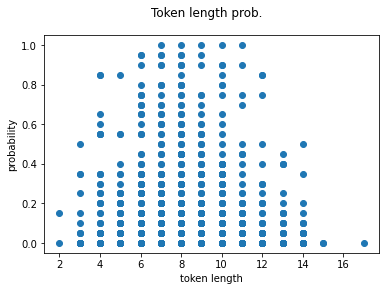

In [43]:
plt.scatter(instances_tokens, instances_prob)
plt.suptitle("Token length prob.")
plt.ylabel("probability")
plt.xlabel("token length")
plt.savefig(f"{cwd}/plots/A_8_1_length.png")
plt.show()


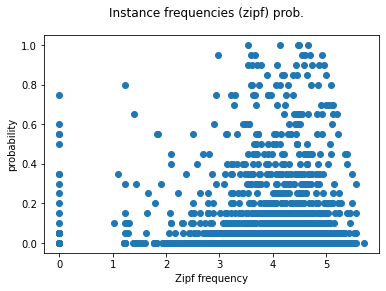

In [44]:
plt.scatter(instances_frequencies, instances_prob)
plt.suptitle("Instance frequencies (zipf) prob.")
plt.ylabel("probability")
plt.xlabel("Zipf frequency")
plt.savefig(f"{cwd}/plots/A_8_2_frequency.png")
plt.show()

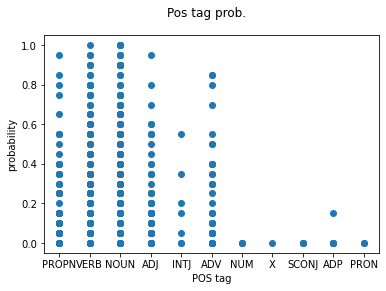

In [45]:
plt.scatter(instances_pos, instances_prob)
plt.suptitle("Pos tag prob.")
plt.ylabel("probability")
plt.xlabel("POS tag")
plt.savefig(f"{cwd}/plots/A_8_3_pos.png")
plt.show()

Interpretation:

### 9. Reflection (1 Point)
Can you think of another linguistic characteristic that might have an influence on the 
perceived complexity of a word? Propose at least one and explain your choice in 2-4 
sentences. 

-the word being an inflection or a lemma
-the difficulty of the context of the sentence (inference)

### 10. Baselines (2 Points)
Implement four baselines for the task in TODO_baselines.py. 

**SO A MAJORITY CLASS SHOULD BE THE MAJORITY CLASS PER TOKEN, NOT FOR THE ENTIRE DATASET. BUT THEY MADE IT SO YOU HAVE TO PROGRAM A SINGLE MAJORITY CLASS PER DATASET**

In [46]:
# Implement four baselines for the task.
# Majority baseline: always assigns the majority class of the training data
# Random baseline: randomly assigns one of the classes. Make sure to set a random seed and average the accuracy over 100 runs.
# Length baseline: determines the class based on a length threshold
# Frequency baseline: determines the class based on a frequency threshold

from model.data_loader import DataLoader

# Each baseline returns predictions for the test data. The length and frequency baselines determine a threshold using the development data.

def baseline(train_sentences, train_labels, testinput, testlabels, baseline_style, length_threshold = "default", frequency_threshold = "default"):
    predictions = []

    if baseline_style == "majority":
        labels = []
        for i in range(len(train_labels)):
            sentence = train_labels[i].split(" ")
            for token in sentence:
                labels.append(token)

        majority_class = Counter(labels).most_common(1)[0][0]
        predictions = []
        for instance in testinput:
            tokens = instance.split(" ")
            for token in tokens:
                predictions.append(majority_class)
    
    elif baseline_style == "random":
        labels = []
        for i in range(len(train_labels)):
            sentence = train_labels[i].split(" ")
            for token in sentence:
                labels.append(token)
        baseline_set = list(set(labels))

        predictions = []
        for instance in testinput:
            tokens = instance.split(" ")
            for token in tokens:
                random_baseline = baseline_set[random.randint(1, len(baseline_set) -1)]
                predictions.append(random_baseline)

    elif baseline_style == "length":
        n_labels = []
        c_labels = []

        for i in range(len(train_labels)):
            
            label_sentence = train_labels[i].split(" ")
            sent_sentence = train_sentences[i].split(" ")

            for token in range(len(label_sentence)):
                if label_sentence[token] == ("N" or "N\n"):
                    n_labels.append(len(sent_sentence[token]))
                elif label_sentence[token] == ("C" or "C\n"):
                    c_labels.append(len(sent_sentence[token]))
            
        global length_n_mean 
        length_n_mean = np.mean(n_labels)
        global length_c_mean 
        length_c_mean = np.mean(c_labels)
        for instance in testinput:
            tokens = instance.split(" ")
            for token in tokens:
                token_length = len(token)

                if length_threshold == "default":
                    if abs(token_length - length_n_mean) < abs(token_length - length_c_mean):
                        length_baseline = "N"
                    else:
                        length_baseline = "C"
                    predictions.append(length_baseline)
                else:
                    if token_length < length_threshold:
                        length_baseline = "N"
                    else:
                        length_baseline = "C"
                    predictions.append(length_baseline)

    elif baseline_style == "frequency":
        n_labels = []
        c_labels = []

        for i in range(len(train_labels)):
            
            label_sentence = train_labels[i].split(" ")
            sent_sentence = train_sentences[i].split(" ")

            for token in range(len(label_sentence)):
                if label_sentence[token] == ("N" or "N\n"):
                    n_labels.append(zipf_frequency(sent_sentence[token], 'en'))
                elif label_sentence[token] == ("C" or "C\n"):
                    c_labels.append(zipf_frequency(sent_sentence[token], 'en'))
        
        global frequency_n_mean
        frequency_n_mean = np.mean(n_labels)
        global frequency_c_mean
        frequency_c_mean = np.mean(c_labels)
        for instance in testinput:
            tokens = instance.split(" ")
            for token in tokens:
                if frequency_threshold == "default":
                    token_freq = zipf_frequency(token, 'en')
                    if abs(token_freq - frequency_n_mean) < abs(token_freq - frequency_c_mean):
                        freq_baseline = "N"
                    else:
                        freq_baseline = "C"
                    predictions.append(freq_baseline)
                else:
                    token_freq = zipf_frequency(token, 'en')
                    if token_freq > frequency_threshold:
                        freq_baseline = "N"
                    else:
                        freq_baseline = "C"
                    predictions.append(freq_baseline)


    test_labels = []
    for i in range(len(testlabels)):
        sentence = testlabels[i].split(" ")
        for token in sentence:
            test_labels.append(token)

    acc_counter = 0
    for i in range(len(predictions)):
        if predictions[i] == test_labels[i]:
            acc_counter += 1

    accuracy = round(acc_counter / len(predictions), 2)

    return  accuracy, predictions



if __name__ == '__main__':
    train_path = f"{cwd}/data/preprocessed/train/"
    dev_path = f"{cwd}/data/preprocessed/val/"
    test_path = f"{cwd}/data/preprocessed/test/"

    # Note: this loads all instances into memory. If you work with bigger files in the future, use an iterator instead.

    with open(train_path + "sentences.txt") as sent_file:
        train_sentences = sent_file.readlines()

    with open(train_path + "labels.txt") as label_file:
        train_labels = label_file.readlines()


    with open(dev_path + "sentences.txt") as dev_file:
        dev_sentences = dev_file.readlines()

    with open(train_path + "labels.txt") as dev_label_file:
        dev_labels = dev_label_file.readlines()
    with open(test_path + "sentences.txt") as testfile:
        testinput = testfile.readlines()

    with open(test_path + "labels.txt") as test_labelfile:
        testlabels = test_labelfile.readlines()

    dev_majority_accuracy, dev_majority_predictions = baseline(train_sentences, train_labels, dev_sentences, dev_labels, baseline_style ="majority")
    dev_random_accuracy, dev_random_predictions = baseline(train_sentences, train_labels, dev_sentences, dev_labels, baseline_style="random")
    dev_length_accuracy, dev_length_predictions = baseline(train_sentences, train_labels, dev_sentences, dev_labels, baseline_style="length")
    dev_frequency_accuracy, dev_frequency_predictions = baseline(train_sentences, train_labels, dev_sentences, dev_labels, baseline_style="frequency")

    test_majority_accuracy, test_majority_predictions = baseline(train_sentences, train_labels, testinput, testlabels, baseline_style="majority")
    test_random_accuracy, test_random_predictions = baseline(train_sentences, train_labels, testinput, testlabels, baseline_style="random")
    test_length_accuracy, test_length_predictions = baseline(train_sentences, train_labels, testinput, testlabels, baseline_style="length")
    test_frequency_accuracy, test_frequency_predictions = baseline(train_sentences, train_labels, testinput, testlabels, baseline_style="frequency")

    baselines = ["Majority", "Random", "Length", "Frequency"]
    acc_dev = [dev_majority_accuracy, dev_random_accuracy, dev_length_accuracy, dev_frequency_accuracy]
    acc_test = [test_majority_accuracy, test_random_accuracy, test_length_accuracy, test_frequency_accuracy]
    baseline_df = pd.DataFrame({"Baseline":baselines, "Accuracy on dev": acc_dev, "Accuracy on test":acc_test})

baseline_df

,Baseline,Accuracy on dev,Accuracy on test
0,Majority,0.78,0.75
1,Random,0.39,0.40
2,Length,0.65,0.82
3,Frequency,0.59,0.76


In [47]:
current_best_acc = 0
current_best_threshold = 0

for i in np.arange(0, 50, 0.1).tolist():
    accuracy, _ = baseline(train_sentences, train_labels, testinput, testlabels, baseline_style="length", length_threshold=i)
    if accuracy > current_best_acc:
        current_best_acc = accuracy
        current_best_threshold = i

print(f"Best dev accuracy: {current_best_acc} at a threshold of {round(current_best_threshold, 2)}")
        


Best dev accuracy: 0.82 at a threshold of 6.1


In [48]:
accuracy, _ = baseline(train_sentences, train_labels, dev_sentences, dev_labels, baseline_style="length", length_threshold=13.1)
accuracy

0.78

# PART C:  Modeling the task

For part C, we use an implementation for a vanilla LSTM which was originally developed for a 
named entity recognition project for a Stanford course. You can find more documentation here: 
https://github.com/cs230-stanford/cs230-code-examples/tree/master/pytorch/nlp

## 11. Understanding the code (1.5 Points)
Familiarize yourself with our version of the code and try to understand what is going on. 
Answer in your own words (1-3 sentences per question)
Run the file build_vocab.py. What does this script do?

**The build_vocab file contains several functions, the save_vocab_to_file() function returns a vocab file with a token on every new line. The save_dict_to_json() function gets called to store the dataset parameters to a json file, including different dataset sizes and tag information, etc. Lastly, the update_vocab function manages to update the word and tag vocabularies based on the datasets provided before being saved to file by the save_vocab_to_file() function.**

Inspect the file model/net.py. Which layers are being used and what is their function?

